# Основы глубинного обучения, майнор ИАД

## Домашнее задание 1. Введение в PyTorch. Полносвязные нейронные сети.

### Общая информация

Дата выдачи: 20.09.2022

Мягкий дедлайн: 23:59MSK 04.10.2022

Жесткий дедлайн: 23:59MSK 10.10.2022

### Оценивание и штрафы
Максимально допустимая оценка за работу — 10 баллов. За каждый день просрочки снимается 1 балл. Сдавать задание после жёсткого дедлайна сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит предсказывать год выпуска песни (**задача регрессии**) по некоторым звуковым признакам: [данные](https://archive.ics.uci.edu/ml/datasets/yearpredictionmsd). В ячейках ниже находится код для загрузки данных. Обратите внимание, что обучающая и тестовая выборки располагаются в одном файле, поэтому НЕ меняйте ячейку, в которой производится деление данных.

In [2]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import random
# my imports
from tqdm import tqdm
import warnings

import matplotlib.pyplot as plt #for 
import pylab # as if we have diffrant scale of train test, have to bild diffrent graphs

import IPython.display as disp # for intaractive changing graphs

import warnings # turn off warnings
warnings.filterwarnings("ignore")

In [3]:
# %conda install wget

In [4]:
!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

--2022-10-05 06:35:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211011981 (201M) [application/x-httpd-php]
Saving to: ‘data.txt.zip’

data.txt.zip        100%[===================>] 201.24M  58.6MB/s    in 3.8s    

2022-10-05 06:35:34 (53.4 MB/s) - ‘data.txt.zip’ saved [211011981/211011981]



In [5]:
df = pd.read_csv('data.txt.zip', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [6]:
len(df)

515345

In [7]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = 463715
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]

## Задание 0. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Мы будем использовать RMSE как метрику качества. Для самого первого бейзлайна обучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [8]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

rid_liner = Ridge()
rid_liner.fit(X_train, y_train)
answ = rid_liner.predict(X_test)
print("Ridge model - ",mean_squared_error(y_test, answ,squared = False))

Ridge model -  9.510160711373397


In [9]:
s = [x**2 for x in y_test]
s_opt = sum(s) **(1/2)

print("constant model - ",mean_squared_error(y_test, answ,squared = False))

constant model -  9.510160711373397


## Задание 1. (максимум 10 баллов)

Реализуйте обучение и тестирование нейронной сети для предоставленного вам набора данных. Соотношение между полученным значением метрики на тестовой выборке и баллами за задание следующее:

- $\text{RMSE} \le 9.00 $ &mdash; 4 балла
- $\text{RMSE} \le 8.90 $ &mdash; 6 баллов
- $\text{RMSE} \le 8.80 $ &mdash; 8 баллов
- $\text{RMSE} \le 8.75 $ &mdash; 10 баллов

Есть несколько правил, которых вам нужно придерживаться:

- Весь пайплайн обучения должен быть написан на PyTorch. При этом вы можете пользоваться другими библиотеками (`numpy`, `sklearn` и пр.), но только для обработки данных. То есть как угодно трансформировать данные и считать метрики с помощью этих библиотек можно, а импортировать модели из `sklearn` и выбивать с их помощью требуемое качество &mdash; нельзя. Также нельзя пользоваться библиотеками, для которых сам PyTorch является зависимостью.

- Мы никак не ограничиваем ваш выбор архитектуры модели, но скорее всего вам будет достаточно полносвязной нейронной сети.

- Для обучения запрещается использовать какие-либо иные данные, кроме обучающей выборки.

- Ансамблирование моделей запрещено.

### Полезные советы:

- Очень вряд ли, что у вас с первого раза получится выбить качество на 10 баллов, поэтому пробуйте разные архитектуры, оптимизаторы и значения гиперпараметров. В идеале при запуске каждого нового эксперимента вы должны менять что-то одно, чтобы точно знать, как этот фактор влияет на качество.

- Не забудьте, что для улучшения качества модели вам поможет **нормировка таргета**.

- Тот факт, что мы занимаемся глубинным обучением, не означает, что стоит забывать про приемы, использующиеся в классическом машинном обучении. Так что обязательно проводите исследовательский анализ данных, отрисовывайте нужные графики и не забывайте про масштабирование и подбор гиперпараметров.

- Вы наверняка столкнетесь с тем, что ваша нейронная сеть будет сильно переобучаться. Для нейросетей существуют специальные методы регуляризации, например, dropout ([статья](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)) и weight decay ([блогпост](https://towardsdatascience.com/weight-decay-l2-regularization-90a9e17713cd)). Они, разумеется, реализованы в PyTorch. Попробуйте поэкспериментировать с ними.

- Если вы чего-то не знаете, не гнушайтесь гуглить. В интернете очень много полезной информации, туториалов и советов по глубинному обучению в целом и по PyTorch в частности. Но не забывайте, что за скатанный код без ссылки на источник придется ответить по всей строгости!

- Если вы сразу реализуете обучение на GPU, то у вас будет больше времени на эксперименты, так как любые вычисления будут работать быстрее. Google Colab предоставляет несколько GPU-часов (обычно около 8-10) в сутки бесплатно.

- Чтобы отладить код, можете обучаться на небольшой части данных или даже на одном батче. Если лосс на обучающей выборке не падает, то что-то точно идет не так!

- Пользуйтесь утилитами, которые вам предоставляет PyTorch (например, Dataset и Dataloader). Их специально разработали для упрощения разработки пайплайна обучения.

- Скорее всего вы захотите отслеживать прогресс обучения. Для создания прогресс-баров есть удобная библиотека `tqdm`.

- Быть может, вы захотите, чтобы графики рисовались прямо во время обучения. Можете воспользоваться функцией [clear_output](http://ipython.org/ipython-doc/dev/api/generated/IPython.display.html#IPython.display.clear_output), чтобы удалять старый график и рисовать новый на его месте.

**ОБЯЗАТЕЛЬНО** рисуйте графики зависимости лосса/метрики на обучающей и тестовой выборках в зависимости от времени обучения. Если обучение занимает относительно небольшое число эпох, то лучше рисовать зависимость от номера шага обучения, если же эпох больше, то рисуйте зависимость по эпохам. Если проверяющий не увидит такого графика для вашей лучшей модели, то он в праве снизить баллы за задание.

**ВАЖНО!** Ваше решение должно быть воспроизводимым. Если это не так, то проверяющий имеет право снизить баллы за задание. Чтобы зафиксировать random seed, воспользуйтесь функцией из ячейки ниже.



In [10]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

Вы можете придерживаться любой адекватной струкуры кода, но мы советуем воспользоваться следующими сигнатурами функций. Лучше всего, если вы проверите ваши предсказания ассертом: так вы убережете себя от разных косяков, например, что вектор предсказаний состоит из всего одного числа. В любом случае, внимательно следите за тем, для каких тензоров вы считаете метрику RMSE. При случайном или намеренном введении в заблуждение проверяющие очень сильно разозлятся.

#Analytics

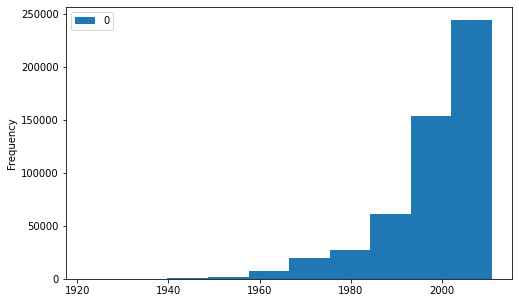

In [11]:
data_4_analytics = pd.DataFrame(y)
# target distribution check
data_4_analytics.plot(kind='hist', figsize=(8,5))
# nothing interesting
# exp-like increasing graph. 

In [12]:
# no isna objcts - can not clearly say it from  description of data
X_data = pd.DataFrame(X)
a = [X_data[k].isnull().any() for k in X_data.keys()]
print(any(a))
X_data = 0

False


#standart skaling

In [13]:
y_train_n = [[y] for y in  y_train]
y_test_n = [[y] for y in  y_test]

# standart skaling
from sklearn.preprocessing import StandardScaler

s_1 = StandardScaler()
X_tr_mod = s_1.fit_transform(X_train)
s_2 = StandardScaler()
y_tr_mod = s_2.fit_transform(y_train_n)

X_ts_mod = s_1.fit_transform(X_test)
y_ts_mod = s_2.transform(y_test_n)

In [14]:
# from our lesson
class MyDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """
    def __init__(self, x, y):
        self.x = x
        self.y =torch.tensor(y, dtype=torch.float32)
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {"sample": torch.tensor(self.x[idx, :], dtype=torch.float32), "target": self.y[idx]}

#Settings
of dataloader, model, optimizer, criterion

In [23]:
set_random_seed(0)
# training constants:
n_epochs = 200
b_size = 16
val_size = 100
n_inputs = int(len(X_tr_mod[0]))

sub_size = 1000 # sub set for debbug size

from pandas.core.common import random_state

train_set = MyDataset(X_tr_mod,y_tr_mod)
train_loader = torch.utils.data.DataLoader(train_set,batch_size = b_size, 
                                           shuffle= True,pin_memory=False, drop_last=False)

test_set = MyDataset(X_ts_mod,y_ts_mod)
test_loader = torch.utils.data.DataLoader(test_set,batch_size = b_size, 
                                           shuffle= True,pin_memory=False, drop_last=False)

val_set = MyDataset(X_ts_mod,y_test)
val_loader = torch.utils.data.DataLoader(val_set, batch_size = b_size, 
                                           shuffle= True,pin_memory=False, drop_last=False)

sub_set = MyDataset(X_tr_mod[:sub_size],y_tr_mod[:sub_size])
sub_loader = torch.utils.data.DataLoader(sub_set,batch_size = b_size, 
                                           shuffle= True,pin_memory=False, drop_last=False)


model = nn.Sequential(
    nn.Linear(n_inputs, 60),
    nn.Dropout(p=0.5),
    nn.ReLU(),
    nn.Linear(60, 20),
    nn.ReLU(),
    nn.BatchNorm1d(num_features = 20),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

optimizer = torch.optim.Adam(model.parameters(),lr=0.0011, eps=1e-8 )
criterion = nn.MSELoss()

best_params ={
    'model' : nn.Sequential(),
    'n_epochs' : 0,
    'b_size' : 0,
    'count' : 0,
    'optimizer' : torch.optim.Adam(model.parameters()),
    'val_loss' : 1000 ,
    'tr_loss' : 0
}
min_loss = 1000


##Train

In [24]:
def train(model, optimizer, criterion, train_loader, test_loader,n_epochs ):
    '''
    params:
        model - torch.nn.Module to be fitted
        optimizer - model optimizer
        criterion - loss function from torch.nn
        train_loader - torch.utils.data.Dataloader with train set
        test_loader - torch.utils.data.Dataloader with test set
                      (if you wish to validate during training)
    '''
    loss_hist_v = []
    loss_hist_tr = []
    val_loss = [100]
    for epoch in range(n_epochs):
      # train
      count = 0
      
      for bat in tqdm(train_loader):
            model.train()
            tr_loss = []
            y_train = bat['target']
            x_train = bat['sample']

            y_pred = model(x_train)
            loss = torch.sqrt(criterion(y_pred, y_train))
            loss.backward()

            optimizer.step()
            optimizer.zero_grad()

            tr_loss.append(loss.detach().numpy())
            count += 1
            if count%(1000) == 0:
              with torch.no_grad():
                model.eval()
                # predicts =  torch.Tensor( 
                #     s_2.inverse_transform(
                #       model( 
                #         torch.Tensor(
                #           test_loader.dataset.x
                #           )
                #       ).detach().numpy())
                #     )
                # val_loss.append(mean_squared_error(predicts, y_test, squared = False))
                val_loss.append(mean_squared_error(test(model, criterion, test_loader), y_test, squared = False))

              #  pretty graphs
                if count%(3000) == 0:
                  disp.clear_output(wait=True)
                    
                  loss_hist_v.append(val_loss[-1])
                  plt.subplot(2,1,1)
                  pylab.plot(loss_hist_v)
                  plt.title ("validation loss")
                  plt.xlabel("n*3000 sampels", fontsize=14)
                  plt.ylabel("validation score", fontsize=14)

                  loss_hist_tr.append(np.mean(tr_loss))
                  pylab.subplot(2,1,2)       
                  pylab.plot(loss_hist_tr)
                  plt.title ("train loss")  
                  plt.xlabel("n*3000 sampels", fontsize=14)
                  plt.ylabel("Train score", fontsize=14)

                  plt.tight_layout()
                  pylab.show()
            
                  print(f"\nEpoch: {epoch}, train_loss: {np.mean(tr_loss)}, val_loss: {val_loss[-1]}, best: { best_params['val_loss']}")
              if val_loss[-1] <= 10 and val_loss[-1] < best_params['val_loss']:
                print("It's becomming smaller!")
                best_params['model'] = model #not workong..
                best_params['n_epochs'] = n_epochs
                best_params['b_size'] = b_size
                best_params['count'] = count
                best_params['optimizer'] = optimizer
                best_params['val_loss'] = val_loss[-1]
                best_params['tr_loss'] = np.mean(tr_loss)
                if val_loss[-1] <= 8.8:
                   print("It's 8")
                   return 
    # raise NotImplementedError


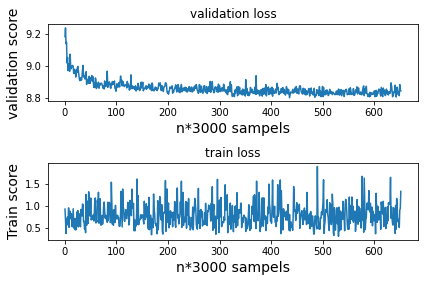

 52%|█████▏    | 15059/28983 [00:34<00:53, 259.58it/s]


Epoch: 72, train_loss: 1.328969955444336, val_loss: 8.84551449870095, best: 8.801919267505726


 55%|█████▌    | 15999/28983 [00:37<00:30, 432.14it/s]

It's becomming smaller!
It's 8

 Loss value on test -  8.799978159637599


In [25]:
train(model ,optimizer,criterion, train_loader, test_loader,n_epochs)

preds = test(best_params['model'], criterion, test_loader)
print("\n Loss value on test - ",mean_squared_error(preds, y_test, squared = False))

##Test


In [22]:
def test(model, criterion, test_loader):
    '''
    params:
        model - torch.nn.Module to be evaluated on test set
        criterion - loss function from torch.nn
        test_loader - torch.utils.data.Dataloader with test set
    ----------
    returns:
        predicts - torch.tensor with shape (len(test_loader.dataset), ),
                   which contains predictions for test objects
    '''
    model.eval()
    with torch.no_grad():
      predicts =  torch.Tensor( 
          s_2.inverse_transform(
              model( 
                  torch.Tensor(
                      test_loader.dataset.x
                      )
                  ).detach().numpy()
                  )
          )
      
    return predicts

In [26]:
best_params

{'model': Sequential(
   (0): Linear(in_features=90, out_features=60, bias=True)
   (1): Dropout(p=0.5, inplace=False)
   (2): ReLU()
   (3): Linear(in_features=60, out_features=20, bias=True)
   (4): ReLU()
   (5): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (6): Linear(in_features=20, out_features=10, bias=True)
   (7): ReLU()
   (8): Linear(in_features=10, out_features=1, bias=True)
 ), 'n_epochs': 200, 'b_size': 16, 'count': 16000, 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     eps: 1e-08
     foreach: None
     lr: 0.0011
     maximize: False
     weight_decay: 0
 ), 'val_loss': 8.799978159637599, 'tr_loss': 0.45040825}

In [27]:
preds = test(best_params['model'], criterion, test_loader)
print("\n Loss value on test - ",mean_squared_error(preds, y_test, squared = False))



 Loss value on test -  8.799978159637599


## Задание 2. (0 баллов, но при невыполнении максимум за все задание &mdash; 0 баллов)

Напишите небольшой отчет о том, как вы добились полученного качества: какие средства использовали и какие эксперименты проводили. Подробно расскажите об архитектурах и значениях гиперпараметров, а также какие метрики на тесте они показывали. Чтобы отчет был зачтен, необходимо привести хотя бы 3 эксперимента.

1. Начал с baiseline в 8.9. Структура: 


    nn.Sequential(
    nn.Linear(n_inputs, 30),
    nn.ReLU(),
    nn.Linear(30, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
    )

- С оптимайзером:

    torch.optim.SGD(model.parameters(), lr=0.01)

- Кроме того target и признаки были отнормированны при помощи:


    StandardScaler()

- Количество эпох и разбивка бача:


    n_epochs = 200
    b_size = 16

- гиперпарамаетры, которые я о изменении которых, я дополнительно не писал, оставались преждними.
2. Далее добавил решил увеличить количесттво нейронов на линейных слоях и добавить dropout:


    model = nn.Sequential(
    nn.Linear(n_inputs, 90),
    nn.Dropout(p=0.5),
    nn.ReLU(),
    nn.Linear(90, 60),
    nn.ReLU(),
    nn.Linear(60, 15),
    nn.ReLU(),
    nn.Linear(15, 1)
    )

- Оптимизатор был заменён на torch.optim.Adam() с станадартными значениями. (При попытки их поменять максимальный лосс изменялся только в худшую сторону. Подобные эксперементы проводил и с параметром p в блоке Dropout, однако сие не давало заметного прироста.)

- Обучение шло очень долго и переодически наблюдались выпады (пики) значения которое превышало близьлежащие лоссы на порядки. При этом удалось достигнуть значения в 8.85.

3. В Последней модели я уменьшил суммарное число нейронов и добавил батч нормировку, теперь модель имела следующую структуру:


    model = nn.Sequential(
    nn.Linear(n_inputs, 60),
    nn.Dropout(p=0.5),
    nn.ReLU(),
    nn.Linear(60, 20),
    nn.ReLU(),
    nn.BatchNorm1d(num_features = 20),
    nn.Linear(20, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
    )

- Оптимайзер был заменён на:


    torch.optim.Adam(model.parameters(),lr=0.0011,eps=1e-8 )

(производилось несколько замеров с разными lr, только его значение в 0.0011 принесло необходимые результаты loss в 8.79)





P.S. 
Дорой проверяющий,
  Я слишком поздно понял, что отрисовка граффиков в wandb сильно упрощает вам жизнь. В следующий раз, обязательно буду использовать. Так же как и переложение вычислений на cuda)